In [3]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import cv2
from scipy.spatial.transform import Rotation as Rot
import json
from egomimic.utils.egomimicUtils import *
import torchvision

## Custom Hand Data

In [12]:
data = h5py.File("/run/media/Dati/Sviluppo/Università/Tesi/EgoMimic/pick_bustina_human.hdf5", "r")
nds(data)

dict with keys:  <KeysViewHDF5 ['data', 'mask']>
data: dict with keys:  <KeysViewHDF5 ['demo_0', 'demo_1', 'demo_2', 'demo_3', 'demo_4', 'demo_5']>
	demo_0: dict with keys:  <KeysViewHDF5 ['actions_xyz', 'actions_xyz_act', 'obs']>
		actions_xyz: (114, 10, 3)
		actions_xyz_act: (114, 100, 3)
		obs: dict with keys:  <KeysViewHDF5 ['ee_pose', 'front_img_1', 'front_img_1_line', 'front_img_1_mask', 'front_img_1_masked']>
			ee_pose: (114, 3)
			front_img_1: (114, 480, 640, 3)
			front_img_1_line: (114, 480, 640, 3)
			front_img_1_mask: (114, 480, 640)
			front_img_1_masked: (114, 480, 640, 3)
	demo_1: dict with keys:  <KeysViewHDF5 ['actions_xyz', 'actions_xyz_act', 'obs']>
		actions_xyz: (120, 10, 3)
		actions_xyz_act: (120, 100, 3)
		obs: dict with keys:  <KeysViewHDF5 ['ee_pose', 'front_img_1', 'front_img_1_line', 'front_img_1_mask', 'front_img_1_masked']>
			ee_pose: (120, 3)
			front_img_1: (120, 480, 640, 3)
			front_img_1_line: (120, 480, 640, 3)
			front_img_1_mask: (120, 480, 640)


[[0.05464765 0.35862236 0.60026512]]


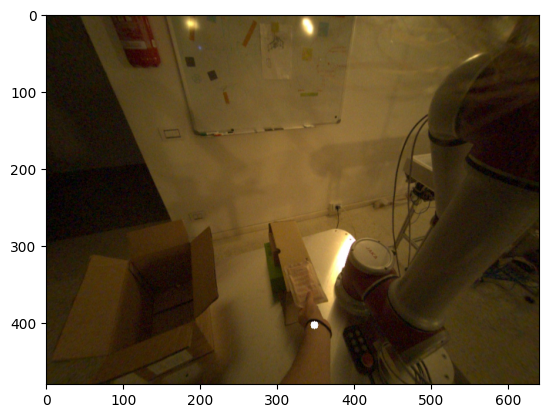

In [14]:
T = 30
hand_pose = data["data/demo_1/obs/ee_pose"][[T]]
print(hand_pose)
px = cam_frame_to_cam_pixels(hand_pose, WIDE_LENS_HAND_LEFT_K)
img = data["data/demo_1/obs/front_img_1"][T]
img = draw_dot_on_frame(img, px, show=False)
plt.imshow(img)

In [15]:
data["data/demo_1/obs/ee_pose"][[T]].round(2)

array([[0.05, 0.36, 0.6 ]])

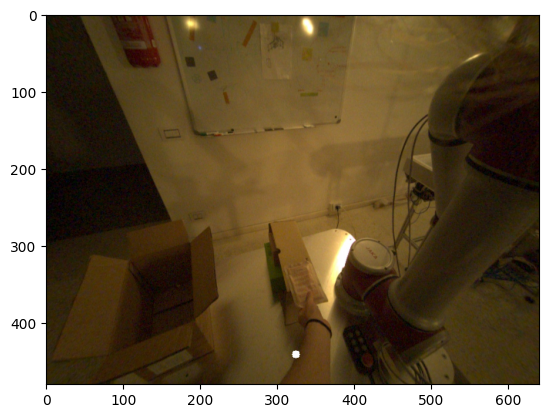

In [16]:
T = 30
ee_pose = np.array([[-0.0, -0.2, -0.27]])
px = cam_frame_to_cam_pixels(ee_pose, WIDE_LENS_HAND_LEFT_K)
img = data["data/demo_1/obs/front_img_1"][T]
img = draw_dot_on_frame(img, px, show=False)
plt.imshow(img)

## Aria Hand Data

In [4]:
# data = h5py.File("/coc/flash7/datasets/egoplay/_OBOO_ARIA/oboo_aria_apr11/rawAria/oboo_aria_apr11/converted/oboo_aria_apr11_Mimicplay_LH3_3dim.hdf5", "r")
# data = h5py.File("/coc/flash7/datasets/egoplay/_OBOO_ARIA/oboo_yellow_jun12/converted/oboo_yellow_jun12_ACTGMMCompat_masked.hdf5", "r")
data = h5py.File("/run/media/Dati/Sviluppo/Università/Tesi/EgoMimic/pick_bustina_human.hdf5", "r")
nds(data)

dict with keys:  <KeysViewHDF5 ['data', 'mask']>
data: dict with keys:  <KeysViewHDF5 ['demo_0', 'demo_1', 'demo_2', 'demo_3', 'demo_4', 'demo_5']>
	demo_0: dict with keys:  <KeysViewHDF5 ['actions_xyz', 'actions_xyz_act', 'obs']>
		actions_xyz: (114, 10, 3)
		actions_xyz_act: (114, 100, 3)
		obs: dict with keys:  <KeysViewHDF5 ['ee_pose', 'front_img_1', 'front_img_1_line', 'front_img_1_mask', 'front_img_1_masked']>
			ee_pose: (114, 3)
			front_img_1: (114, 480, 640, 3)
			front_img_1_line: (114, 480, 640, 3)
			front_img_1_mask: (114, 480, 640)
			front_img_1_masked: (114, 480, 640, 3)
	demo_1: dict with keys:  <KeysViewHDF5 ['actions_xyz', 'actions_xyz_act', 'obs']>
		actions_xyz: (120, 10, 3)
		actions_xyz_act: (120, 100, 3)
		obs: dict with keys:  <KeysViewHDF5 ['ee_pose', 'front_img_1', 'front_img_1_line', 'front_img_1_mask', 'front_img_1_masked']>
			ee_pose: (120, 3)
			front_img_1: (120, 480, 640, 3)
			front_img_1_line: (120, 480, 640, 3)
			front_img_1_mask: (120, 480, 640)


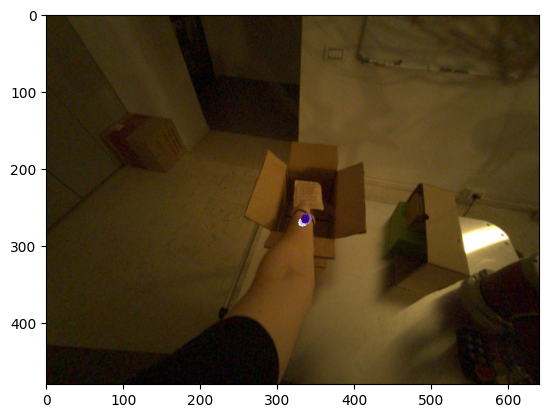

In [5]:
T = 100
demo = "demo_1"
hand_pose_l = data[f"data/{demo}/actions_xyz_act"][T, :, :3]
hand_pose_r = data[f"data/{demo}/actions_xyz_act"][T, :, 3:]
# hand_pose_l = data[f"data/{demo}/obs/ee_pose"][[T], :3]
# hand_pose_r = data[f"data/{demo}/obs/ee_pose"][[T], 3:]

px = cam_frame_to_cam_pixels(hand_pose_l, WIDE_LENS_HAND_LEFT_K)
# px2 = cam_frame_to_cam_pixels(hand_pose_r, WIDE_LENS_HAND_LEFT_K)
img = data[f"data/{demo}/obs/front_img_1"][T]
img = draw_dot_on_frame(img, px, show=False, palette="Purples")
# img = draw_dot_on_frame(img, px2, show=False, palette="Oranges")
# print(px.round(0).astype(int), px2.round(0).astype(int))
plt.imshow(img)

In [7]:
demo = "demo_1"
all_imgs = []
for t in range(0, 119):
    hand_pose_l = data[f"data/{demo}/actions_xyz_act"][t, :, :3]
    hand_pose_r = data[f"data/{demo}/actions_xyz_act"][t, :, 3:]
    px = cam_frame_to_cam_pixels(hand_pose_l, WIDE_LENS_HAND_LEFT_K)
    # px2 = cam_frame_to_cam_pixels(hand_pose_r, WIDE_LENS_HAND_LEFT_K)
    img = data[f"data/{demo}/obs/front_img_1"][t]
    img = draw_dot_on_frame(img, px, show=False, palette="Purples")
    # img = draw_dot_on_frame(img, px2, show=False, palette="Oranges")
    all_imgs.append(img)

all_imgs = torch.from_numpy(np.array(all_imgs))
# make video via torchvision
torchvision.io.write_video(f"hand_pose_filterv4_{demo}.mp4", all_imgs, fps=30)


/run/media/Dati/Sviluppo/Università/Tesi/EgoMimic/venv/lib/python3.12/site-packages/torchvision/io/_video_deprecation_warning.py:5: UserWarning: The video decoding and encoding capabilities of torchvision are deprecated from version 0.22 and will be removed in version 0.24. We recommend that you migrate to TorchCodec, where we'll consolidate the future decoding/encoding capabilities of PyTorch: https://github.com/pytorch/torchcodec
  warnings.warn(


## Robot Data

In [6]:
data = h5py.File("/run/media/Dati/Sviluppo/Università/Tesi/EgoMimic/pick_bustina_robot.hdf5", "r")
nds(data)

dict with keys:  <KeysViewHDF5 ['data', 'mask']>
data: dict with keys:  <KeysViewHDF5 ['demo_1']>
	demo_1: dict with keys:  <KeysViewHDF5 ['actions_joints', 'actions_joints_act', 'actions_xyz', 'actions_xyz_act', 'obs']>
		actions_joints: (600, 10, 7)
		actions_joints_act: (600, 100, 7)
		actions_xyz: (600, 10, 3)
		actions_xyz_act: (600, 100, 3)
		obs: dict with keys:  <KeysViewHDF5 ['ee_pose', 'front_img_1', 'front_img_1_line', 'joint_positions']>
			ee_pose: (600, 3)
			front_img_1: (600, 480, 640, 3)
			front_img_1_line: (600, 480, 640, 3)
			joint_positions: (600, 7)
mask: dict with keys:  <KeysViewHDF5 ['train', 'valid']>
	train: (1,)
	valid: (0,)


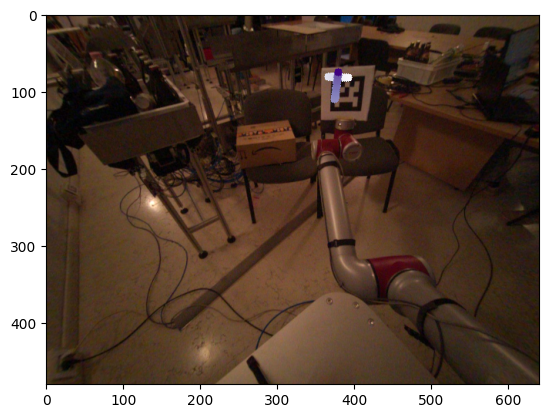

In [8]:
T = 100
demo = "demo_1"
hand_pose_l = data[f"data/{demo}/actions_xyz_act"][T, :, :3]
# hand_pose_r = data[f"data/{demo}/actions_xyz_act"][T, :, 3:]
# hand_pose_l = data[f"data/{demo}/obs/ee_pose"][[T], :3]
# hand_pose_r = data[f"data/{demo}/obs/ee_pose"][[T], 3:]

px = cam_frame_to_cam_pixels(hand_pose_l, WIDE_LENS_HAND_LEFT_K)
# px2 = cam_frame_to_cam_pixels(hand_pose_r, WIDE_LENS_HAND_LEFT_K)
img = data[f"data/{demo}/obs/front_img_1"][T]
img = draw_dot_on_frame(img, px, show=False, palette="Purples")
#img = draw_dot_on_frame(img, px2, show=False, palette="Oranges")
# print(px.round(0).astype(int), px2.round(0).astype(int))
plt.imshow(img)

In [9]:
demo = "demo_1"
all_imgs = []
for t in range(0, 599):
    hand_pose_l = data[f"data/{demo}/actions_xyz_act"][t, :, :3]
    # hand_pose_r = data[f"data/{demo}/actions_xyz_act"][t, :, 3:]
    px = cam_frame_to_cam_pixels(hand_pose_l, WIDE_LENS_HAND_LEFT_K)
    # px2 = cam_frame_to_cam_pixels(hand_pose_r, WIDE_LENS_HAND_LEFT_K)
    img = data[f"data/{demo}/obs/front_img_1"][t]
    img = draw_dot_on_frame(img, px, show=False, palette="Purples")
    # img = draw_dot_on_frame(img, px2, show=False, palette="Oranges")
    all_imgs.append(img)

all_imgs = torch.from_numpy(np.array(all_imgs))
# make video via torchvision
torchvision.io.write_video(f"robot_data_{demo}.mp4", all_imgs, fps=30)

## Aloha Data

In [36]:
data = h5py.File("/home/andrea/Sviluppo/Università/Tesi/robot_recordings/CALIBRATE/episode_1.hdf5", "r")
nds(data)

dict with keys:  <KeysViewHDF5 ['action', 'observations']>
action: (600, 7)
observations: dict with keys:  <KeysViewHDF5 ['images', 'qpos']>
	images: dict with keys:  <KeysViewHDF5 ['cam_high']>
		cam_high: (600, 480, 640, 3)
	qpos: (600, 7)


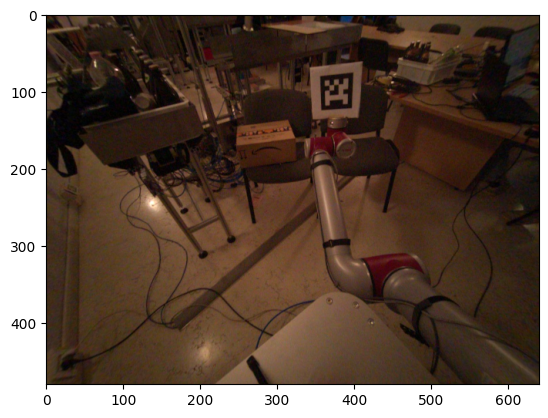

In [37]:
plt.imshow(data["observations/images/cam_high"][599])